In [1]:
# Always run this cell first when you start a new session
!pip install imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 71.9 MB/s eta 0:00:00:00:01:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
category-encoders 2.7.0 requires scikit-learn<1.6.0,>=1.0.0, but you have scikit-learn 1.6.1 which is incompatible.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cloudpredictionsystemproject.csv


In [4]:
file_path = '/kaggle/input/cloudpredictionsystemproject.csv' 

df = pd.read_csv(file_path)

print("\nSuccessfully loaded the data. Here are the first 5 rows:")
print(df.head())


Successfully loaded the data. Here are the first 5 rows:
         Date Location  MinimumTemperature  MaximumTemperature  Rainfall  \
0  01-12-2008   Albury                13.4                22.9       0.6   
1  02-12-2008   Albury                 7.4                25.1       0.0   
2  03-12-2008   Albury                12.9                25.7       0.0   
3  04-12-2008   Albury                 9.2                28.0       0.0   
4  05-12-2008   Albury                17.5                32.3       1.0   

   Evaporation  Sunshine WindGustDirection  WindGustSpeed WindDirection9am  \
0          NaN       NaN                 W           44.0                W   
1          NaN       NaN               WNW           44.0              NNW   
2          NaN       NaN               WSW           46.0                W   
3          NaN       NaN                NE           24.0               SE   
4          NaN       NaN                 W           41.0              ENE   

   ... Humidity9

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [5]:
df.describe()

,MinimumTemperature,MaximumTemperature,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temperature9am,Temperature3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [6]:

column_names = df.columns

print(column_names)

Index(['Date', 'Location', 'MinimumTemperature', 'MaximumTemperature',
       'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDirection',
       'WindGustSpeed', 'WindDirection9am', 'WindDirection3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temperature9am',
       'Temperature3pm', 'CloudBurst Today', 'CloudBurstTomorrow'],
      dtype='object')


In [7]:
row_names = df.shape

print(row_names)

(145460, 23)


In [8]:

null_counts = df.isnull().sum()

print(null_counts)

Date                      0
Location                  0
MinimumTemperature     1485
MaximumTemperature     1261
Rainfall               3261
Evaporation           62790
Sunshine              69835
WindGustDirection     10326
WindGustSpeed         10263
WindDirection9am      10566
WindDirection3pm       4228
WindSpeed9am           1767
WindSpeed3pm           3062
Humidity9am            2654
Humidity3pm            4507
Pressure9am           15065
Pressure3pm           15028
Cloud9am              55888
Cloud3pm              59358
Temperature9am         1767
Temperature3pm         3609
CloudBurst Today       3261
CloudBurstTomorrow     3267
dtype: int64


In [9]:

categorical_cols = df.select_dtypes(include=['object', 'category']).columns

print("Non-numeric columns found:")
print(categorical_cols.tolist())

Non-numeric columns found:
['Date', 'Location', 'WindGustDirection', 'WindDirection9am', 'WindDirection3pm', 'CloudBurst Today', 'CloudBurstTomorrow']


In [10]:

for col in categorical_cols:
    print(f"\n--- Analysis for Column: {col} ---")
    
    unique_count = df[col].nunique()
    print(f"Number of unique values: {unique_count}")
    
    print("Value Counts:")
    print(df[col].value_counts())


--- Analysis for Column: Date ---
Number of unique values: 3436
Value Counts:
Date
12-11-2013    49
01-09-2014    49
23-08-2014    49
24-08-2014    49
25-08-2014    49
              ..
29-11-2007     1
28-11-2007     1
27-11-2007     1
26-11-2007     1
31-01-2008     1
Name: count, Length: 3436, dtype: int64

--- Analysis for Column: Location ---
Number of unique values: 49
Value Counts:
Location
Canberra            3436
Sydney              3344
Darwin              3193
Melbourne           3193
Brisbane            3193
Adelaide            3193
Perth               3193
Hobart              3193
Albany              3040
MountGambier        3040
Ballarat            3040
Townsville          3040
GoldCoast           3040
Cairns              3040
Launceston          3040
AliceSprings        3040
Bendigo             3040
Albury              3040
MountGinini         3040
Wollongong          3040
Newcastle           3039
Tuggeranong         3039
Penrith             3039
Woomera             3009

In [11]:
df.dropna(subset=['CloudBurstTomorrow'], inplace=True)

df.drop(columns=['Sunshine', 'Evaporation', 'Cloud3pm', 'Cloud9am'], inplace=True)

In [12]:

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    df[col].fillna(df[col].median(), inplace=True)

/tmp/ipykernel_37/3836043715.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [13]:

categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

/tmp/ipykernel_37/2897740223.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [14]:
print(df.isnull().sum())

Date                  0
Location              0
MinimumTemperature    0
MaximumTemperature    0
Rainfall              0
WindGustDirection     0
WindGustSpeed         0
WindDirection9am      0
WindDirection3pm      0
WindSpeed9am          0
WindSpeed3pm          0
Humidity9am           0
Humidity3pm           0
Pressure9am           0
Pressure3pm           0
Temperature9am        0
Temperature3pm        0
CloudBurst Today      0
CloudBurstTomorrow    0
dtype: int64


In [15]:
df.describe()

,MinimumTemperature,MaximumTemperature,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temperature9am,Temperature3pm
count,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000
mean,12.185565,23.225365,2.326738,39.920123,13.992489,18.644279,68.858235,51.495742,1017.648460,1015.252481,16.985681,21.675977
std,6.388936,7.109617,8.426426,13.140632,8.851614,8.721688,18.932512,20.532227,6.746267,6.681810,6.472206,6.871243
min,-8.500000,-4.800000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,-7.200000,-5.400000
25%,7.600000,17.900000,0.000000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.000000,12.300000,16.700000
50%,12.000000,22.600000,0.000000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,16.700000,21.100000
75%,16.800000,28.200000,0.600000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,21.500000,26.300000
max,33.900000,48.100000,371.000000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,40.200000,46.700000


CloudBurstTomorrow
No     110316
Yes     31877
Name: count, dtype: int64


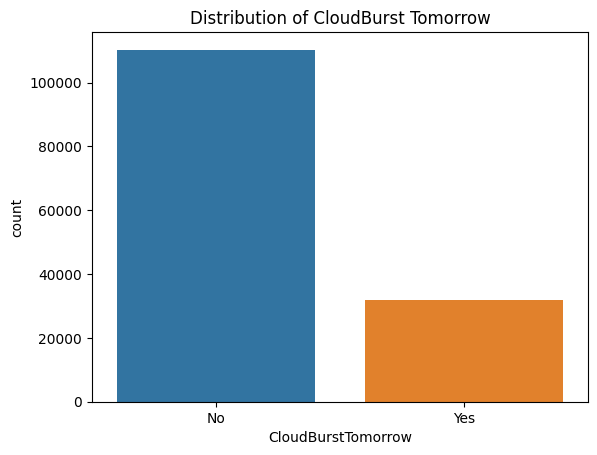

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

print(df['CloudBurstTomorrow'].value_counts())

# Visualize it
sns.countplot(x='CloudBurstTomorrow', data=df)
plt.title('Distribution of CloudBurst Tomorrow')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

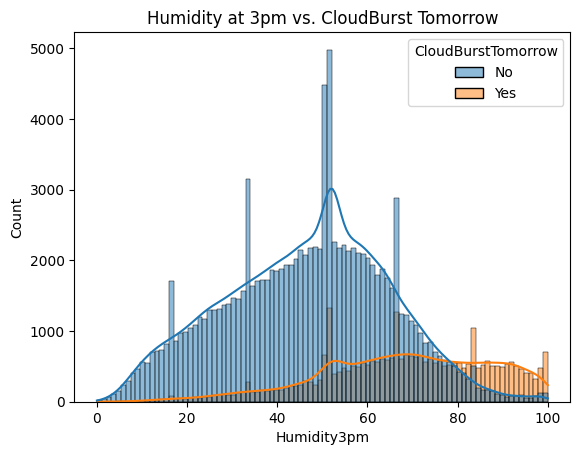

In [17]:

sns.histplot(data=df, x='Humidity3pm', hue='CloudBurstTomorrow', kde=True)
plt.title('Humidity at 3pm vs. CloudBurst Tomorrow')
plt.show()

In [18]:
df['CloudBurstTomorrow'] = df['CloudBurstTomorrow'].map({'No': 0, 'Yes': 1})
df['CloudBurst Today'] = df['CloudBurst Today'].map({'No': 0, 'Yes': 1})

In [19]:
import pandas as pd

# Tell pandas the format is Day-Month-Year ('%d-%m-%Y')
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Now you can extract the month and day without any errors
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# Display the result to confirm
print(df[['Month', 'Day']].head())

   Month  Day
0     12    1
1     12    2
2     12    3
3     12    4
4     12    5


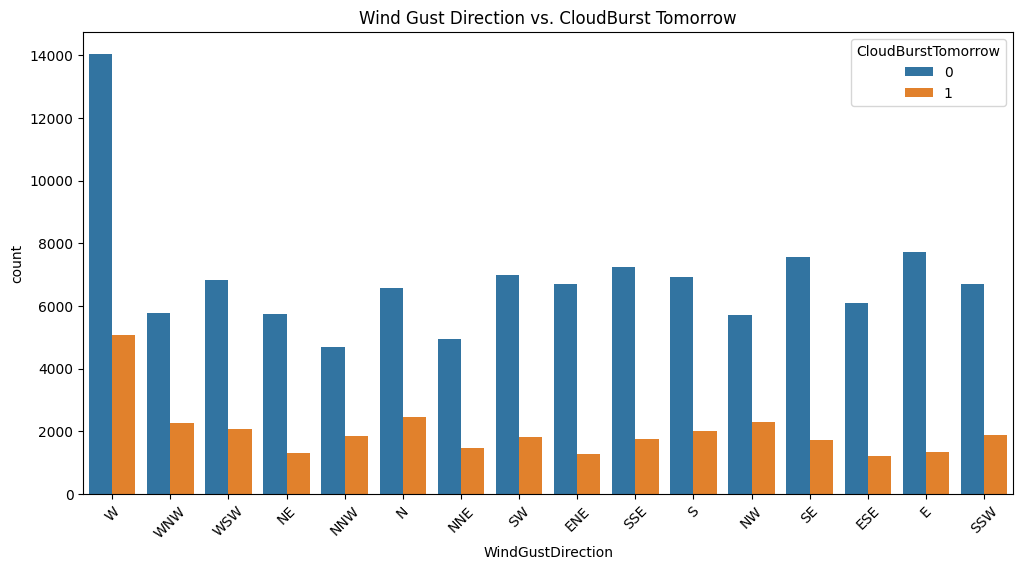

In [20]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='WindGustDirection', hue='CloudBurstTomorrow')
plt.title('Wind Gust Direction vs. CloudBurst Tomorrow')
plt.xticks(rotation=45)
plt.show()

In [21]:
# Identify categorical columns (excluding the target which is now 0/1)
categorical_cols = df.select_dtypes(include=['object']).columns

print(categorical_cols)

Index(['Location', 'WindGustDirection', 'WindDirection9am',
       'WindDirection3pm'],
      dtype='object')


In [22]:
# Apply one-hot encoding
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [23]:
print(len(df.columns))
print(df.columns)

110
Index(['Date', 'MinimumTemperature', 'MaximumTemperature', 'Rainfall',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am',
       ...
       'WindDirection3pm_NNW', 'WindDirection3pm_NW', 'WindDirection3pm_S',
       'WindDirection3pm_SE', 'WindDirection3pm_SSE', 'WindDirection3pm_SSW',
       'WindDirection3pm_SW', 'WindDirection3pm_W', 'WindDirection3pm_WNW',
       'WindDirection3pm_WSW'],
      dtype='object', length=110)


In [24]:
df.drop('Date', axis=1, inplace=True)

In [25]:
# 'X' contains all columns except the target
X = df.drop('CloudBurstTomorrow', axis=1)

# 'y' contains only the target column
y = df['CloudBurstTomorrow']
from sklearn.preprocessing import StandardScaler

# Note: In a real project, you'd do this AFTER splitting into train/test sets
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.96      0.91     22064
           1       0.79      0.48      0.59      6375

    accuracy                           0.85     28439
   macro avg       0.83      0.72      0.75     28439
weighted avg       0.85      0.85      0.84     28439


Confusion Matrix:


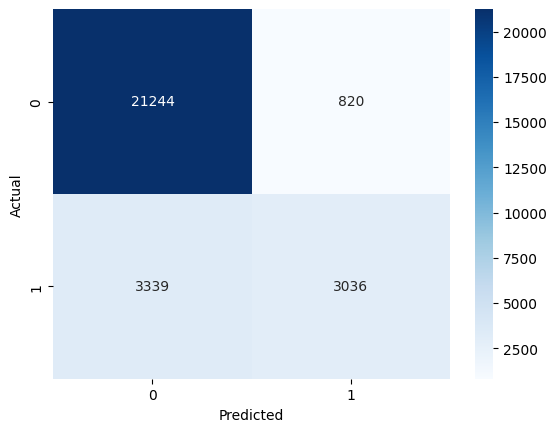

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# We use RandomForest with class_weight to handle imbalance
model = RandomForestClassifier(class_weight='balanced', random_state=42)

# Train on the prepared training data
model.fit(X_train, y_train)

# --- 6. Evaluate the Model ---

# Make predictions on the unseen test data
y_pred = model.predict(X_test)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Display the confusion matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Before SMOTE, counts of label '1': 25502
Before SMOTE, counts of label '0': 88252 

After SMOTE, the shape of X_train: (176504, 108)
After SMOTE, counts of label '1': 88252
After SMOTE, counts of label '0': 88252 

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90     22064
           1       0.65      0.64      0.65      6375

    accuracy                           0.84     28439
   macro avg       0.78      0.77      0.77     28439
weighted avg       0.84      0.84      0.84     28439


Confusion Matrix:


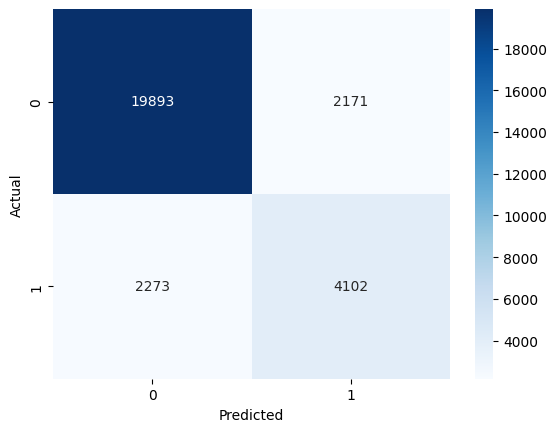

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE  # <-- Import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

# Assume 'X' and 'y' are your fully preprocessed features and target
# from the previous steps

# --- 1. Split Data into Training and Testing Sets ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- 2. Scale Numerical Features ---
# We fit the scaler ONLY on the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- 3. Apply SMOTE to the Training Data ---
print("Before SMOTE, counts of label '1': {}".format(sum(y_train == 1)))
print("Before SMOTE, counts of label '0': {} \n".format(sum(y_train == 0)))

sm = SMOTE(random_state=42)
# Resample ONLY the training data
X_train_resampled, y_train_resampled = sm.fit_resample(X_train_scaled, y_train)

print("After SMOTE, the shape of X_train: {}".format(X_train_resampled.shape))
print("After SMOTE, counts of label '1': {}".format(sum(y_train_resampled == 1)))
print("After SMOTE, counts of label '0': {} \n".format(sum(y_train_resampled == 0)))


# --- 4. Train the Model on the Resampled Data ---
# We can remove class_weight='balanced' now that the data is balanced
model = RandomForestClassifier(random_state=42)

# Train on the new, balanced training data
model.fit(X_train_resampled, y_train_resampled)


# --- 5. Evaluate the Model on the Original Test Data ---
y_pred = model.predict(X_test_scaled)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
